In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [26]:
df=pd.read_csv("e:/presentation1.csv")
x = df.iloc[:,0:24]
y=df.iloc[:,-1]
target=y

In [27]:
x=scale(x)
len(x)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


25

plt.scatter(df.iloc[:,25:26],df.iloc[:,-1],marker='*',color='green')

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x = lda.fit_transform(x, y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x,y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.70)

In [31]:
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

1.0

In [32]:
model.score(x_test,y_test) #accuracy

1.0

In [33]:
model.predict_proba(x_test)

array([[0.99613702, 0.00386298],
       [0.00954528, 0.99045472],
       [0.00201074, 0.99798926],
       [0.00297234, 0.99702766],
       [0.00626209, 0.99373791],
       [0.98286531, 0.01713469],
       [0.99260323, 0.00739677],
       [0.04519272, 0.95480728],
       [0.03118194, 0.96881806],
       [0.01995053, 0.98004947],
       [0.01843891, 0.98156109],
       [0.01605451, 0.98394549],
       [0.00839472, 0.99160528],
       [0.00306118, 0.99693882],
       [0.99762534, 0.00237466],
       [0.99577985, 0.00422015],
       [0.99481718, 0.00518282],
       [0.9903114 , 0.0096886 ]])

In [34]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [35]:
y_test

3     0
21    1
22    1
18    1
12    1
6     0
9     0
20    1
16    1
24    1
8     1
1     1
2     1
23    1
11    0
5     0
0     0
7     0
Name: 0.14, dtype: int64

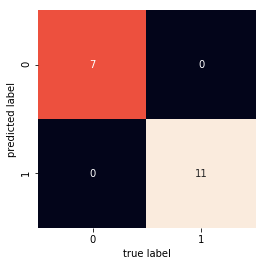

In [36]:
#cm=confusion_matrix(y_test,y_pred)
#cm
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)# cv=no of splits


print("Accuracy(using Cross validation): %.2f%%" % (scores.mean()*100.0)) 

Accuracy(using Cross validation): 80.00%


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [15]:
scores

array([0.83333333, 0.66666667, 1.        , 0.75      , 0.75      ])